# Network of Spotify Genres - Data

This is the 1st part of the analysis that looks into the network of genre tags in spotify. In this part, I use the Spotify API to download the data and shape it as we need for the analysis

In [74]:
import sys
import spotipy
import spotipy.util as util
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import itertools
client_credentials_manager = SpotifyClientCredentials('40cd9cd27c7c4689bc36774f5aac188b','10d3a4b01aea4976ac89c831db901a6d')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

We need an unbiased and lasrge enough sample of all artists in spotify. Spotify's own account on spotify featuring playlists made my Spotify's staff and algorithms is a good place to start, as they have the most number of public playlists on the platform covering a variety of genres and eras. So first, let's print allthe playlists created by Spotify's team. There's a lot of genre, mood and era specific plalists, along with "This is:" playlists that focus on one particular artists big hits

In [75]:
playlists = sp.user_playlists('spotify')
playlist_ids = []
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
        playlist_ids.append(playlist['id'])
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:37i9dQZF1DXcBWIGoYBM5M Today's Top Hits
   2 spotify:playlist:37i9dQZF1DX0XUsuxWHRQd RapCaviar
   3 spotify:playlist:37i9dQZF1DX1lVhptIYRda Hot Country
   4 spotify:playlist:37i9dQZF1DX10zKzsJ2jva ¡Viva Latino!
   5 spotify:playlist:37i9dQZF1DX4JAvHpjipBk New Music Friday
   6 spotify:playlist:37i9dQZF1DX4dyzvuaRJ0n mint
   7 spotify:playlist:37i9dQZF1DX4SBhb3fqCJd Are & Be
   8 spotify:playlist:37i9dQZF1DWXRqgorJj26U Rock Classics
   9 spotify:playlist:37i9dQZF1DX4sWSpwq3LiO Peaceful Piano
  10 spotify:playlist:37i9dQZF1DXcF6B6QPhFDv Rock This
  11 spotify:playlist:37i9dQZF1DWXJfnUiYjUKT New Music Friday
  12 spotify:playlist:37i9dQZF1DXcRXFNfZr7Tp TGIF
  13 spotify:playlist:37i9dQZF1DX4o1oenSJRJd All Out 00s
  14 spotify:playlist:37i9dQZF1DXbTxeAdrVG2l All Out 90s
  15 spotify:playlist:37i9dQZF1DX4UtSsGT1Sbe All Out 80s
  16 spotify:playlist:37i9dQZF1DWTJ7xPn4vNaz All Out 70s
  17 spotify:playlist:37i9dQZF1DXaKIA8E7WcJj All Out 60s
  18 spotify:playlist:37i9dQZF

The next step is to get the data on all the tracks in each of these plalists and collect data on the artists of these tracks as well. we drop all duplicate artists and convert the data into a dataframe with over 37000 artists

In [ ]:
trackslist = [] 
for j,i in enumerate(playlist_ids):
#     if j%50 == 0:
#         print(j)
    tracks = sp.playlist_tracks(i, limit = 100)
    trackslist.append(tracks['items'])
    while tracks['next']:
        tracks = sp.next(tracks)
        trackslist.append(tracks['items'])

In [5]:
tracks = [j['track'] for i in trackslist for j in i]
artistids = [j['id'] for i in tracks if i!=None for j in i['artists']]
artistids = pd.Series(artistids).drop_duplicates()
artistids = artistids.dropna()
artists = sp.artists(artistids[:50])['artists']
for i in range(50,len(artistids),50):
    artists.append(sp.artists(artistids[i:(i+50)])['artists'])
artists = artists[:50] + [j for i in artists[50:] for j in i]

retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


In [6]:
for j in range(len(artists)):
        artists[j]['followers'] = artists[j]['followers']['total']
artists = pd.DataFrame.from_dict(artists)
artists = artists.drop_duplicates(subset = ['uri'])
len(artists)

37105

To make sure we have even more artists in our sample set, I use the artist_related_artists() function, which returns up to 20 related artists for every artist I pass as input. This piece takes slightly longer to run, so I have printed markers to keep track of the progress. I also shape the data for a different network in the meantime, where, if 2 artists show up as related, we build an edge between them, this is for a network of artists rather than a network of genres. Now I have over 8-k unique artistsin my database with over 4000 unique genre tags. 

In [7]:
related_artists = []
for j, i in enumerate(artistids):
    if j%50 == 0:
        print(j)
    related_artists.append(sp.artist_related_artists(i))
related_artists = [i for i in related_artists if i!= None]
related_artists = [i['artists'] for i in related_artists]
len(related_artists)

0
50
100
retrying ...2secs
150
200
250
300
retrying ...1secs
350
400
retrying ...1secs
450
500
550
retrying ...1secs
600
650
700
retrying ...2secs
750
800
retrying ...4secs
850
900
retrying ...2secs
950
1000
1050
1100
retrying ...1secs
1150
1200
retrying ...1secs
1250
1300
retrying ...2secs
1350
1400
retrying ...3secs
1450
1500
retrying ...4secs
1550
1600
1650
retrying ...2secs
1700
1750
retrying ...3secs
1800
1850
retrying ...3secs
1900
1950
retrying ...3secs
2000
2050
retrying ...2secs
2100
2150
retrying ...4secs
2200
2250
retrying ...4secs
2300
2350
2400
retrying ...1secs
2450
2500
2550
retrying ...1secs
2600
2650
retrying ...3secs
2700
2750
2800
retrying ...2secs
2850
2900
retrying ...4secs
2950
3000
3050
3100
3150
3200
3250
3300
3350
retrying ...2secs
3400
3450
retrying ...3secs
3500
3550
retrying ...4secs
3600
3650
3700
retrying ...1secs
3750
3800
3850
retrying ...2secs
3900
3950
4000
retrying ...1secs
4050
4100
4150
4200
4250
retrying ...3secs
4300
4350
retrying ...3secs
4400
44

37105

In [8]:
relart = related_artists
for i in range(len(relart)):
    if relart[i]!=[]:
        for j in range(len(relart[i])):
            relart[i][j].update(source_id = artistids.iloc[i])
relart = [j for i in relart for j in i]
for i in range(len(relart)):
    relart[i]['followers'] = relart[i]['followers']['total']
relart = pd.DataFrame.from_dict(relart)

In [9]:
all_artist_data = pd.merge(artists, relart, left_on = 'id', right_on = 'source_id',suffixes=('_source', '_related'))
all_artist_data = all_artist_data.drop_duplicates(subset = ['source_id','id_related'])
all_artist_data = all_artist_data[['followers_source','genres_source','id_source','name_source','popularity_source',
                                  'uri_source','followers_related', 'genres_related','id_related', 'name_related',
                                   'popularity_related','uri_related']]
all_artist_data.to_csv('all_artist_data_final.csv')

In [10]:
artists = artists[[ 'followers', 'genres','id','name','popularity','uri']]
artists.to_csv('artist_data_final.csv')
all_artist_data.head()

,followers_source,genres_source,id_source,name_source,popularity_source,uri_source,followers_related,genres_related,id_related,name_related,popularity_related,uri_related
0,7450747,"[pop, post-teen pop]",6KImCVD70vtIoJWnq6nGn3,Harry Styles,90,spotify:artist:6KImCVD70vtIoJWnq6nGn3,5250822,"[dance pop, pop, pop rock, post-teen pop]",1Hsdzj7Dlq2I7tHP7501T4,Niall Horan,83,spotify:artist:1Hsdzj7Dlq2I7tHP7501T4
1,7450747,"[pop, post-teen pop]",6KImCVD70vtIoJWnq6nGn3,Harry Styles,90,spotify:artist:6KImCVD70vtIoJWnq6nGn3,11699509,"[dance pop, electropop, pop, post-teen pop, uk...",5ZsFI1h6hIdQRw2ti0hz81,ZAYN,83,spotify:artist:5ZsFI1h6hIdQRw2ti0hz81
2,7450747,"[pop, post-teen pop]",6KImCVD70vtIoJWnq6nGn3,Harry Styles,90,spotify:artist:6KImCVD70vtIoJWnq6nGn3,5565051,"[dance pop, edm, pop, post-teen pop, tropical ...",5pUo3fmmHT8bhCyHE52hA6,Liam Payne,78,spotify:artist:5pUo3fmmHT8bhCyHE52hA6
3,7450747,"[pop, post-teen pop]",6KImCVD70vtIoJWnq6nGn3,Harry Styles,90,spotify:artist:6KImCVD70vtIoJWnq6nGn3,3617470,"[boy band, dance pop, pop, post-teen pop, vira...",7gAppWoH7pcYmphCVTXkzs,The Vamps,76,spotify:artist:7gAppWoH7pcYmphCVTXkzs
4,7450747,"[pop, post-teen pop]",6KImCVD70vtIoJWnq6nGn3,Harry Styles,90,spotify:artist:6KImCVD70vtIoJWnq6nGn3,6174984,"[boy band, dance pop, pop, post-teen pop]",5Rl15oVamLq7FbSb0NNBNy,5 Seconds of Summer,86,spotify:artist:5Rl15oVamLq7FbSb0NNBNy


In [76]:
relart  = relart[[ 'followers', 'genres','id','name','popularity','uri']]
allart = relart.append(artists)
allart = allart.drop_duplicates(subset = ['id'])


print(allart.head())
allart.columns = ['followers', 'genres','spotify id','Label','popularity','uri']
strgnrs = ['_'.join(i) for i in allart['genres']]
allart['strgnrs'] = strgnrs

   followers                                             genres  \
0    5250822          [dance pop, pop, pop rock, post-teen pop]   
1   11699509  [dance pop, electropop, pop, post-teen pop, uk...   
2    5565051  [dance pop, edm, pop, post-teen pop, tropical ...   
3    3617470  [boy band, dance pop, pop, post-teen pop, vira...   
4    6174984          [boy band, dance pop, pop, post-teen pop]   

                       id                 name  popularity  \
0  1Hsdzj7Dlq2I7tHP7501T4          Niall Horan          83   
1  5ZsFI1h6hIdQRw2ti0hz81                 ZAYN          83   
2  5pUo3fmmHT8bhCyHE52hA6           Liam Payne          78   
3  7gAppWoH7pcYmphCVTXkzs            The Vamps          76   
4  5Rl15oVamLq7FbSb0NNBNy  5 Seconds of Summer          86   

                                     uri  
0  spotify:artist:1Hsdzj7Dlq2I7tHP7501T4  
1  spotify:artist:5ZsFI1h6hIdQRw2ti0hz81  
2  spotify:artist:5pUo3fmmHT8bhCyHE52hA6  
3  spotify:artist:7gAppWoH7pcYmphCVTXkzs  
4  spotif

In [73]:
allart.to_csv('artists_nodes_gephi.csv', index = False)

In [13]:
all_artist_data.columns = ['followers_source','genres_source','id_source','Source','popularity_source',
                                  'uri_source','followers_related', 'genres_related','id_related', 'Target',
                                   'popularity_related','uri_related']
all_artist_data.to_csv('artists_edges_gephi.csv', index = False)

Since I now have more data on artists (including related artists) than just the genres, I also make subsets of the artists data that fall under a few example genres. Any artist that was tagged with 'funk' would be included in this dataset, I will use gephi to understand communities of related artists this way. This isn't particularly scientific, but as a music nerd, it's pretty fun to see! the nodes are sized according to the number of spotify followers they have. The node colors are according to a community detection algorithm implemented by gephi. 



### Funk
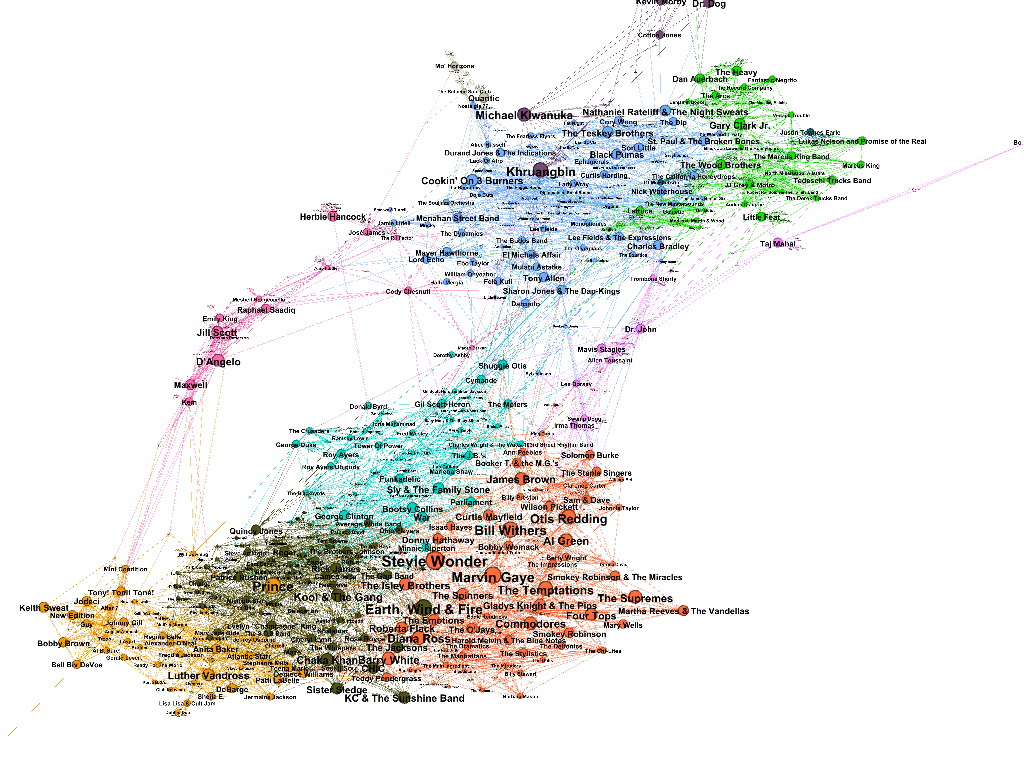

In [77]:
directed_artist = all_artist_data.reset_index(drop = True)
source_mask = directed_artist['genres_source'].apply(lambda x: 'funk' in x)
funk = directed_artist.loc[source_mask]
funk.to_csv('funk_source.csv',index = False)
directed_artist = allart.reset_index(drop = True)
source_mask = directed_artist['genres'].apply(lambda x: 'funk' in x)
funknodes = directed_artist.loc[source_mask]
funknodes['Id'] = funknodes['Label'].copy()
funknodes.to_csv('funk_source_nodes.csv',index = False)

C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Psych Rock
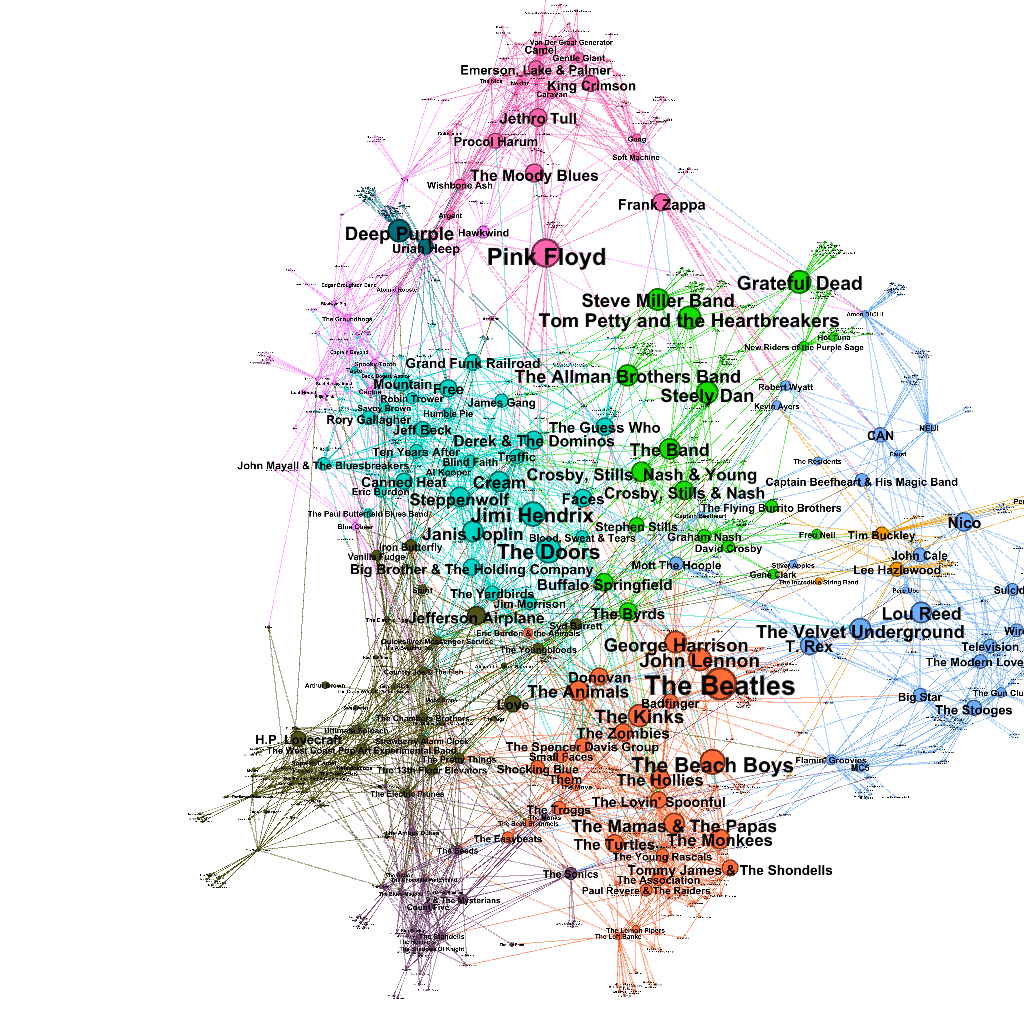

In [15]:
directed_artist = all_artist_data.reset_index(drop = True)
source_mask = directed_artist['genres_source'].apply(lambda x: 'psychedelic rock' in x)
psychrock = directed_artist.loc[source_mask]
psychrock.to_csv('psychrock_source.csv',index = False)
directed_artist = allart.reset_index(drop = True)
source_mask = directed_artist['genres'].apply(lambda x: 'psychedelic rock' in x)
psychrocknodes = directed_artist.loc[source_mask]
psychrocknodes['Id'] = psychrocknodes['Label'].copy()
psychrocknodes.to_csv('psychrocknodes_source_nodes.csv',index = False)

C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Classic Rock

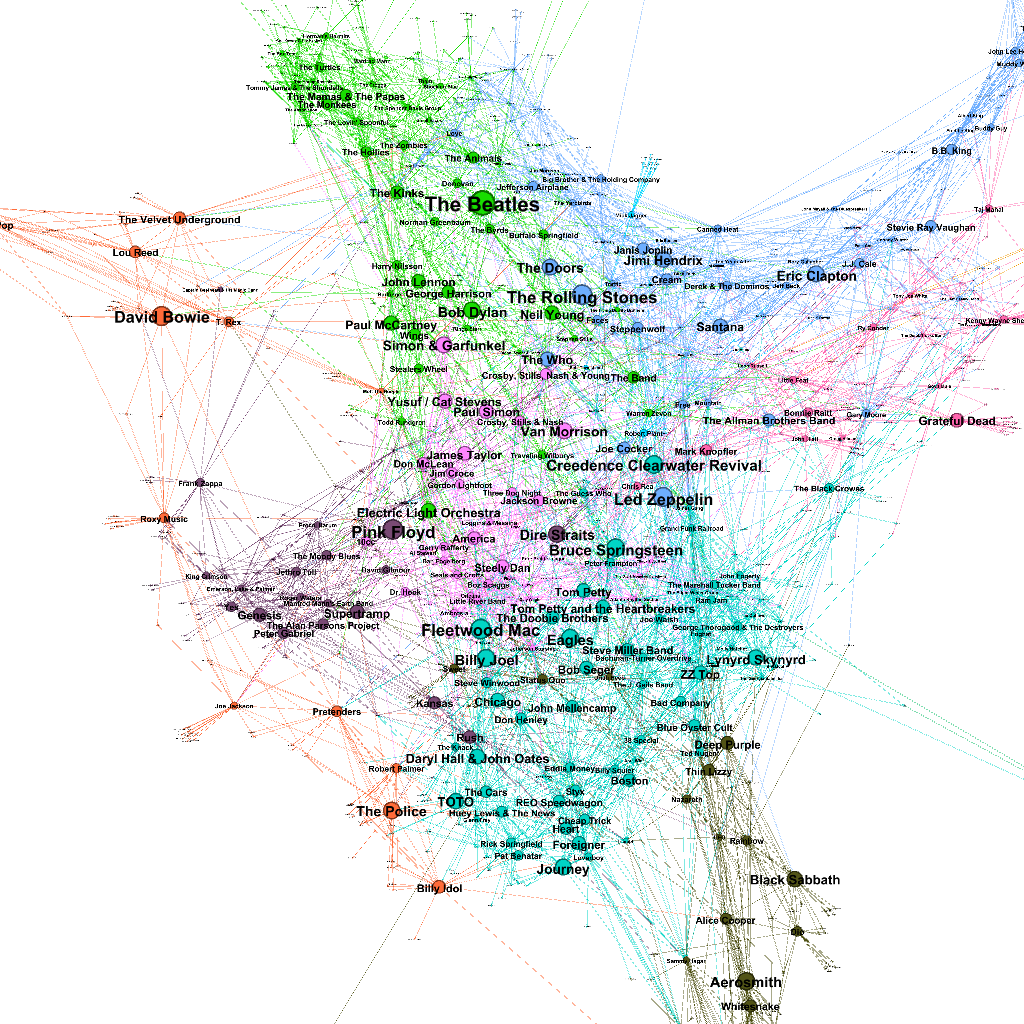

In [78]:
directed_artist = all_artist_data.reset_index(drop = True)
source_mask = directed_artist['genres_source'].apply(lambda x: 'classic rock' in x)
classicrock = directed_artist.loc[source_mask]
classicrock.to_csv('classicrock_source.csv',index = False)
directed_artist = allart.reset_index(drop = True)
source_mask = directed_artist['genres'].apply(lambda x: 'classic rock' in x)
classicrocknodes = directed_artist.loc[source_mask]
classicrocknodes['Id'] = classicrocknodes['Label'].copy()
classicrocknodes.to_csv('classicrock_source_nodes.csv',index = False)

C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Finally, I seperate the genre tags and create a adjacency matrix that counts how many times each combination of 2 genres has occured in the netwrok, it is a pretty matrix as the density of network is pretty low. Part 2 contains the analysis of the larger Genres network along with important metrics and comparing community detection algorithms

In [19]:
gnrs = [i for i in allart['genres'] if i!= []]
c = [list(itertools.combinations(i,2)) for i in gnrs]
a = list(itertools.chain.from_iterable((i, i[::-1]) for c_ in c for i in c_))
dfa = pd.DataFrame(a)
dfgenrs = pd.pivot_table(dfa, index=0, columns=1, aggfunc='size', fill_value=0)
print(a[0])

('dance pop', 'pop')


In [20]:
dfa.to_csv('network_nodes_final.csv',index = False)
dfgenrs.to_csv('network_matrix_final.csv', index = False)